In [1]:
pip install opencv-python numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 7.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#El arte con Andy Warhol
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar una imagen en modo BGR
img = cv2.imread('Mona_Lisa.jpg')

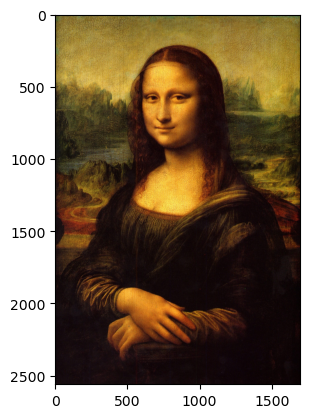

In [5]:
# Convertir BGR a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando matplotlib
plt.imshow(img_rgb)
plt.show()

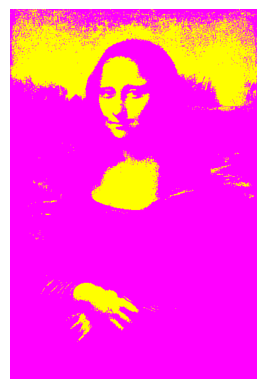

In [9]:
# Redimensionar para hacerlo más rápido
img_resized = cv2.resize(img_rgb, (400, 600))

# Convertir a escala de grises
gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)

# Aplicar umbral para separar fondo y figura
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

# Crear máscara de figura (1 donde hay figura, 0 donde hay fondo)
mask = thresh / 255.0

# Elegir colores de fondo y figura (Warhol style)
background_color = np.array([255, 255, 0])    # Amarillo
figure_color = np.array([255, 0, 255])        # Magenta

# Crear imagen con colores Warhol
warhol_img = np.zeros_like(img_resized)
for c in range(3):  # Canal R, G, B
    warhol_img[:, :, c] = (
        mask * figure_color[c] + (1 - mask) * background_color[c]
    ).astype(np.uint8)

# Mostrar resultado
plt.imshow(warhol_img)
plt.axis('off')
plt.show()

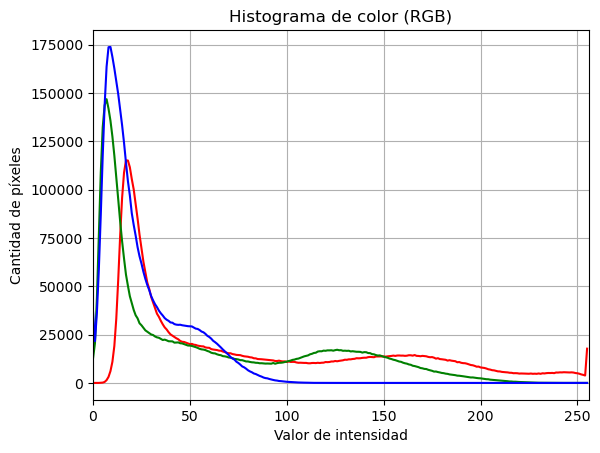

In [10]:
# Calcular y mostrar histograma para cada canal
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title('Histograma de color (RGB)')
plt.xlabel('Valor de intensidad')
plt.ylabel('Cantidad de píxeles')
plt.grid(True)
plt.show()

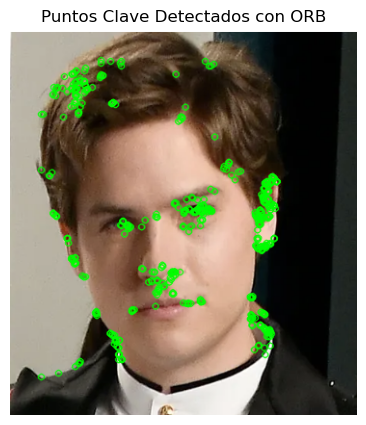

In [4]:
#El arte con gemélos
# Crear un detector ORB
I1 = cv2.imread('DS.png')
orb = cv2.ORB_create()
gray = cv2.cvtColor(I1, cv2.COLOR_RGB2GRAY)

# Detectar puntos clave y computar descriptores
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Dibujar los puntos clave detectados
img_with_keypoints = cv2.drawKeypoints(I1, keypoints, None, color=(0, 255, 0), flags=0)

# Mostrar la imagen con los puntos clave detectados
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Puntos Clave Detectados con ORB')
plt.axis('off')
plt.show()

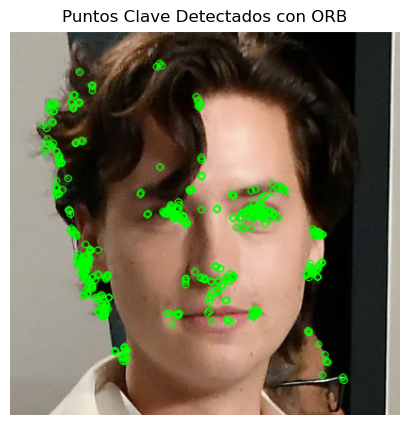

In [5]:
I2 = cv2.imread('CS.png')
orb = cv2.ORB_create()
gray = cv2.cvtColor(I2, cv2.COLOR_RGB2GRAY)

keypoints, descriptors = orb.detectAndCompute(gray, None)

img_with_keypoints = cv2.drawKeypoints(I2, keypoints, None, color=(0, 255, 0), flags=0)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Puntos Clave Detectados con ORB')
plt.axis('off')
plt.show()

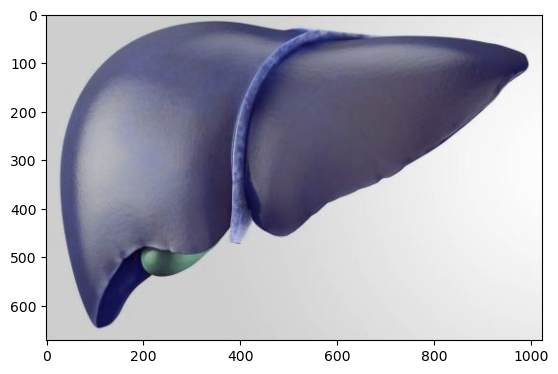

In [6]:
Sano = cv2.imread('HS.png')

plt.figure()
plt.imshow(Sano)
plt.show()

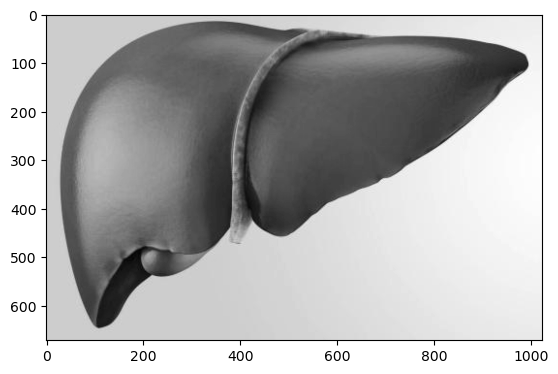

In [9]:
img_bc_gray = cv2.cvtColor(Sano, cv2.COLOR_BGR2GRAY)
plt.imshow(img_bc_gray, cmap='gray')

In [10]:
bc_range = np.where((img_bc_gray==0)|(img_bc_gray==1), img_bc_gray ^ 1, img_bc_gray)
bc_range = 255 * bc_range
bc_range = bc_range.astype(np.uint8)
bc_range

array([[50, 50, 50, ..., 19, 19, 19],
       [50, 50, 50, ..., 19, 19, 19],
       [50, 50, 50, ..., 19, 19, 19],
       ...,
       [50, 50, 50, ..., 23, 23, 23],
       [50, 50, 50, ..., 23, 23, 23],
       [50, 50, 50, ..., 23, 23, 23]], dtype=uint8)

In [11]:
# Crear una imagen en negro con el mismo tamaño
zeros = np.zeros(bc_range.shape, dtype="uint8")
zeros

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

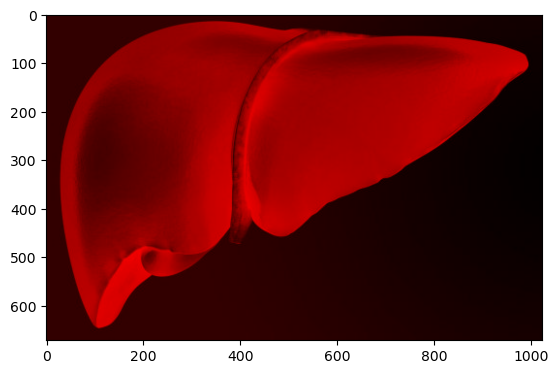

In [12]:
# Crear imágenes para cada canal de color
Sano = cv2.merge([bc_range, zeros, zeros])
plt.imshow(Sano, cmap='gray')

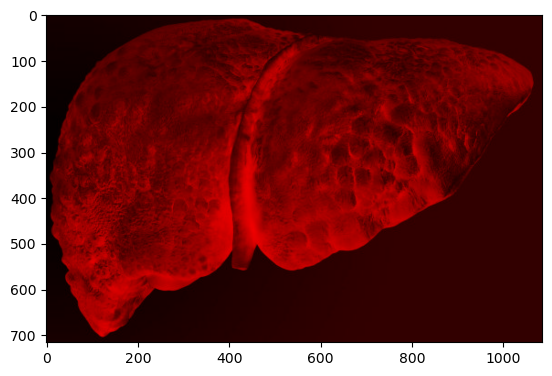

In [16]:
Malo = cv2.imread('HM.png')

img_bc_gray = cv2.cvtColor(Malo, cv2.COLOR_BGR2GRAY)

bc_range = np.where((img_bc_gray==0)|(img_bc_gray==1), img_bc_gray ^ 1, img_bc_gray)
bc_range = 255 * bc_range
bc_range = bc_range.astype(np.uint8)

zeros = np.zeros(bc_range.shape, dtype="uint8")

Malo = cv2.merge([bc_range, zeros, zeros])
plt.imshow(Malo, cmap='gray')